In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import rasterio as rio
import seaborn as sns
import statsmodels.graphics.api as smg
import warnings
warnings.filterwarnings("ignore")

Forma:  (6998, 11757)
Valores únicos:  [1]


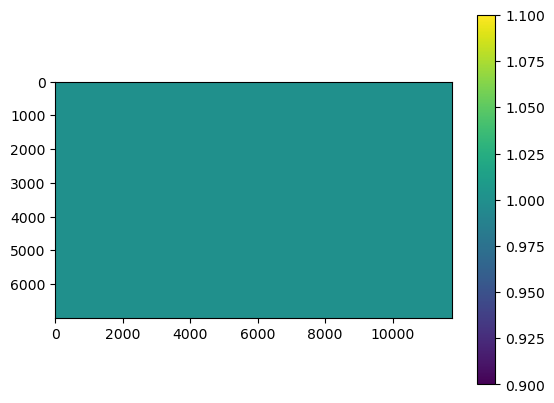

In [2]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Mov_mart\mov_binario.tif')
inventario=raster.read(1)
inventario=np.where(inventario == 65535,0,1)
plt.imshow(inventario)
plt.colorbar();

print('Forma: ', inventario.shape)
print('Valores únicos: ', np.unique(inventario))

In [3]:
print('Valores originales únicos:', np.unique(inventario))

Valores originales únicos: [1]


Forma: (6998, 11757)
Valores únicos: [0 1]
Valor NoData: 0.0


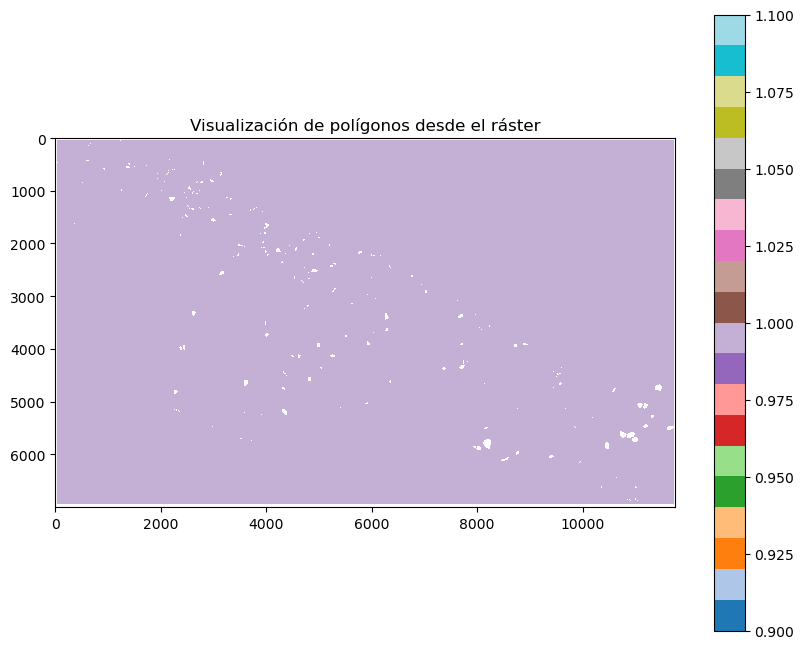

In [4]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

# Cargar el ráster
ruta = r'C:\Users\USUARIO\Desktop\Prueba\Mov_mart\mov_binario.tif'

with rio.open(ruta) as src:
    inventario = src.read(1)
    nodata = src.nodata

print("Forma:", inventario.shape)
print("Valores únicos:", np.unique(inventario))
print("Valor NoData:", nodata)

# Aplicar máscara si hay NoData
if nodata is not None:
    inventario = np.where(inventario == nodata, np.nan, inventario)

# Visualización
plt.figure(figsize=(10, 8))
plt.imshow(inventario, cmap='tab20', interpolation='none')
plt.colorbar()
plt.title('Visualización de polígonos desde el ráster')
plt.show()

Valor NoData: 0.0


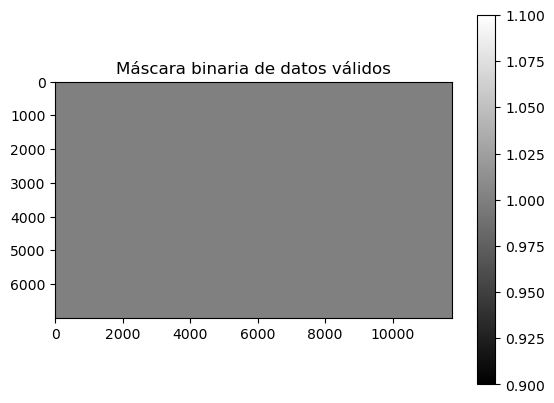

In [5]:
nodata = raster.nodata
print('Valor NoData:', nodata)

# Máscara binaria: 1 donde hay datos válidos, 0 donde hay NoData
mascara = np.where(inventario == nodata, 0, 1)

plt.imshow(mascara, cmap='gray')
plt.title('Máscara binaria de datos válidos')
plt.colorbar()

Forma:  (7969, 13231)
Valores únicos:  [1.]


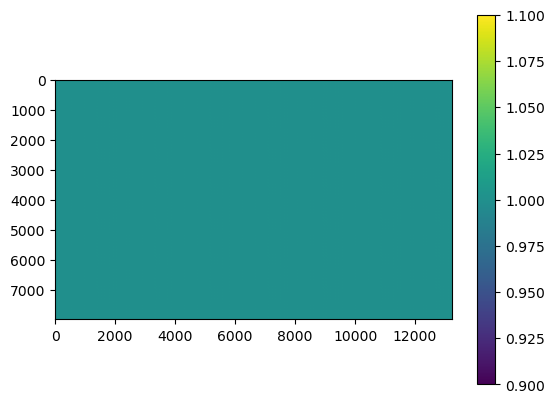

In [6]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif')
msk=raster.read_masks(1)
msk=np.where(msk==0,np.nan,1)
plt.imshow(msk)
plt.colorbar();

print('Forma: ', msk.shape)
print('Valores únicos: ', np.unique(msk))

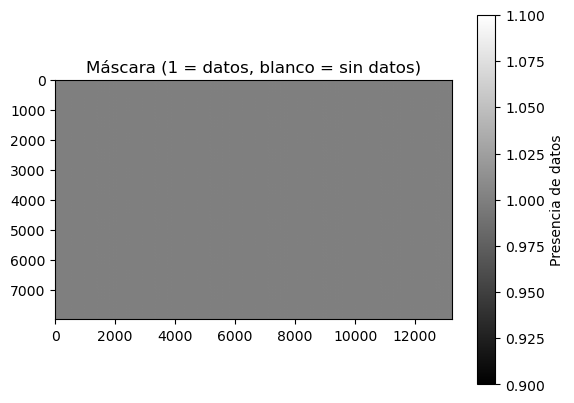

In [7]:
plt.imshow(msk, cmap='gray')
plt.title("Máscara (1 = datos, blanco = sin datos)")
plt.colorbar(label='Presencia de datos')
plt.show()

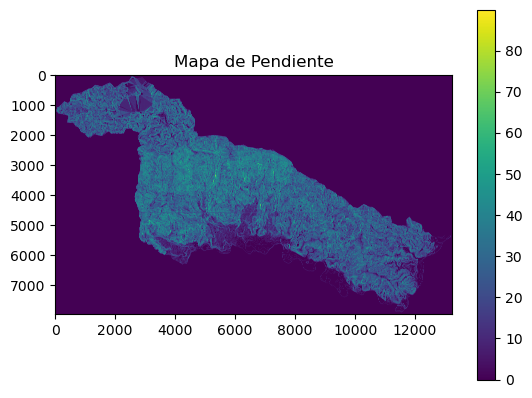

In [8]:
import rasterio as rio
import matplotlib.pyplot as plt

raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif')
pendiente = raster.read(1)

plt.imshow(pendiente, cmap='viridis')
plt.colorbar()
plt.title("Mapa de Pendiente")
plt.show()


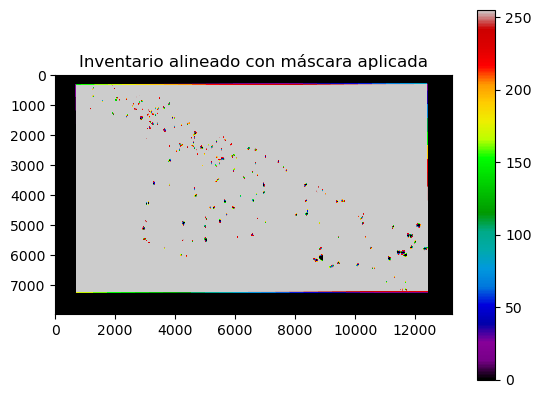

In [9]:
import numpy as np
import rasterio as rio
from rasterio.warp import reproject, Resampling
import matplotlib.pyplot as plt

# Abrir ráster de referencia (pendiente)
with rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif') as src_ref:
    ref_shape = src_ref.read(1).shape
    ref_transform = src_ref.transform
    ref_crs = src_ref.crs
    msk = src_ref.read_masks(1)
    msk = np.where(msk == 0, np.nan, 1)

# Abrir ráster a alinear (inventario)
with rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Mov_mart\Mov_marte.tif') as src_inv:
    inventario = src_inv.read(1)
    aligned_inv = np.empty(ref_shape, dtype=inventario.dtype)

    reproject(
        source=inventario,
        destination=aligned_inv,
        src_transform=src_inv.transform,
        src_crs=src_inv.crs,
        dst_transform=ref_transform,
        dst_crs=ref_crs,
        resampling=Resampling.nearest
    )

# Aplicar la máscara
inventario1 = aligned_inv * msk

# Visualizar
plt.imshow(inventario1, cmap='nipy_spectral')
plt.colorbar()
plt.title("Inventario alineado con máscara aplicada")
plt.show()

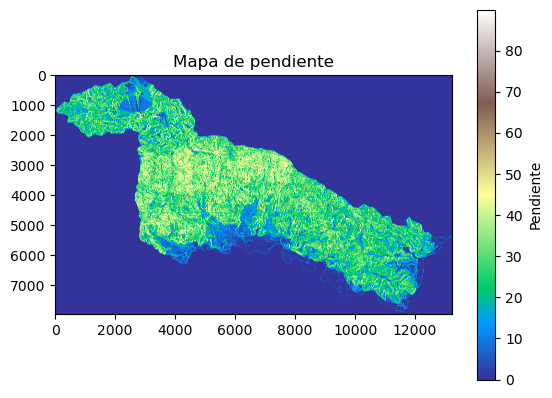

In [10]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

# Abrir el ráster
with rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif') as raster:
    slope = raster.read(1).astype(float)  # leer la banda 1 y convertir a float para poder tener NaNs

# Reemplazar valores negativos con NaN
slope = np.where(slope < 0, np.nan, slope)

# Visualizar
plt.imshow(slope, cmap='terrain')
plt.colorbar(label='Pendiente')
plt.title("Mapa de pendiente")
plt.show()

Forma:  (7969, 13231)
Valores únicos:  [0.0000000e+00 1.2363964e-03 2.4727928e-03 ... 8.9925980e+01 8.9925987e+01
 8.9926003e+01]


numpy.ndarray

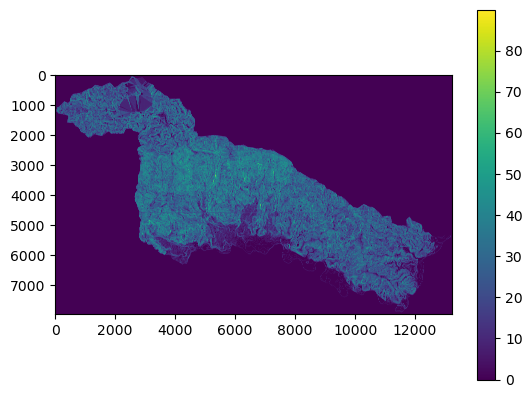

In [11]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif')
slope=raster.read(1)
slope=np.where(slope<0,np.nan,slope)
plt.imshow(slope)
plt.colorbar();

print('Forma: ', slope.shape)
print('Valores únicos: ', np.unique(slope))
type(slope)

Forma:  (7969, 13231)
Valores únicos:  [0.00000000e+00 1.13173148e-04 1.21383986e-04 ... 3.59999664e+02
 3.59999878e+02            nan]


numpy.ndarray

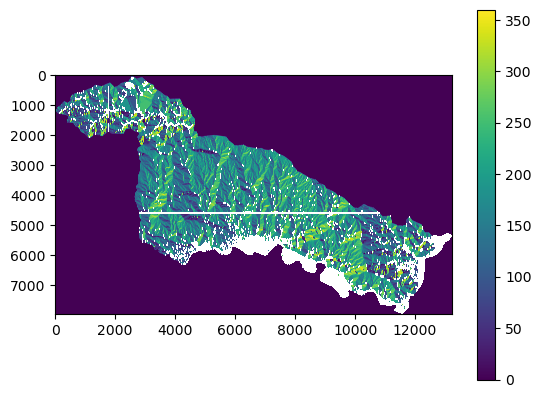

In [12]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Aspecto\Aspect.tif')
aspecto=raster.read(1)
#aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto=np.where(aspecto == aspecto.min(), np.nan, aspecto)
plt.imshow(aspecto)
plt.colorbar()

print('Forma: ', aspecto.shape)
print('Valores únicos: ', np.unique(aspecto))
type(aspecto)

(105437839,)

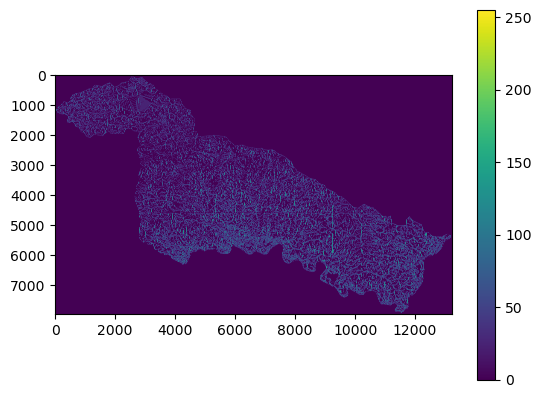

In [13]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\flujo\flujo_ac_lad.tif')
flujo=raster.read(1)
flujo=np.where(flujo<0,np.nan,flujo)
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
plt.imshow(flujo)
plt.colorbar()
flujo.shape
flujo_vector_MenM.shape

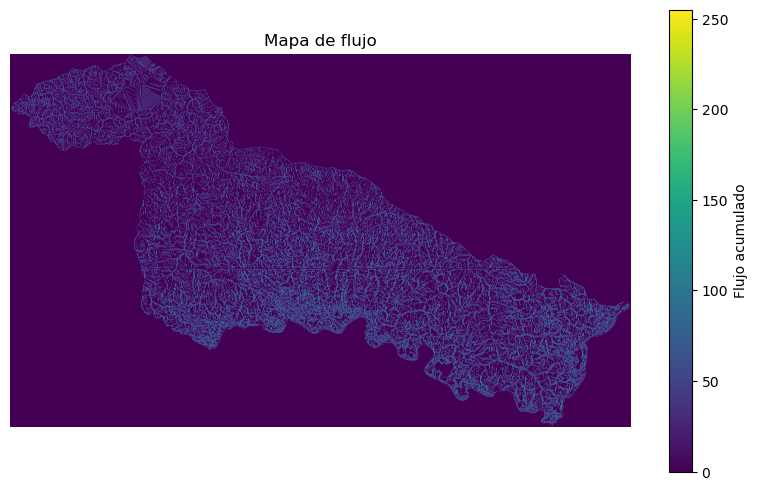

In [14]:
plt.figure(figsize=(10, 6))
plt.imshow(flujo, cmap='viridis')  # Puedes probar otros colormaps también
plt.colorbar(label='Flujo acumulado')
plt.title('Mapa de flujo')
plt.axis('off')
plt.show()

Forma:  (7969, 13231)
Valores únicos:  [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 18

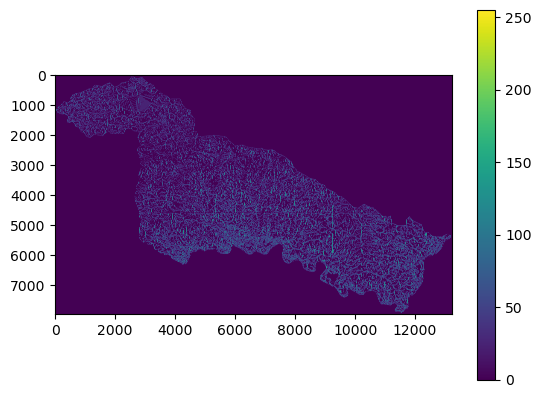

In [15]:
flujo1 = msk*flujo
plt.imshow(flujo1)
plt.colorbar();

print('Forma: ', flujo1.shape)
print('Valores únicos: ', np.unique(flujo1))

Forma:  (7969, 13231)
Valores únicos:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 19

numpy.ndarray

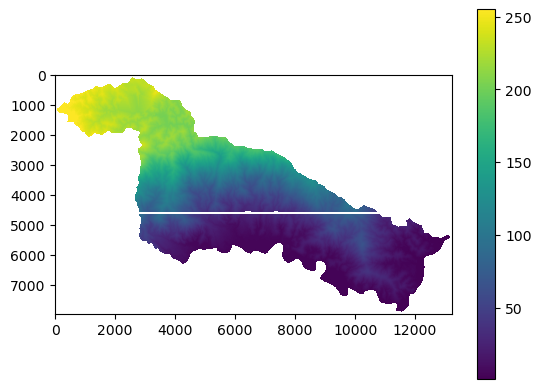

In [16]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\eleva\elevation.tif')
elevacion=raster.read(1)
elevacion=np.where(elevacion==0,np.nan,elevacion)
plt.imshow(elevacion)
plt.colorbar();

print('Forma: ', elevacion.shape)
print('Valores únicos: ', np.unique(elevacion))
type(elevacion)

Forma:  (7969, 13231)
Valores únicos:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 19

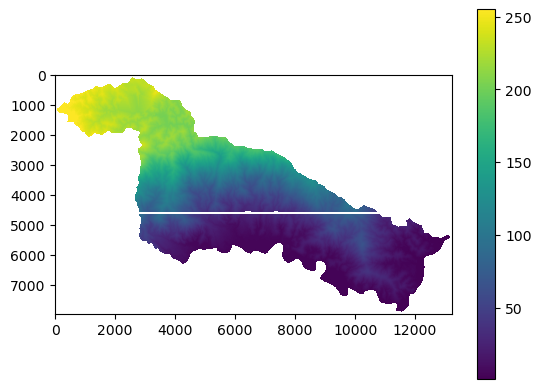

In [17]:
elevacion1 = msk*elevacion
plt.imshow(elevacion1)
plt.colorbar();

print('Forma: ', elevacion1.shape)
print('Valores únicos: ', np.unique(elevacion1))

In [28]:
inventariovector = inventario1.ravel()
print('Longitud inventariovector: ', inventariovector.shape[0])

slopevector = slope.ravel()
print('Longitud slopevector: ', slopevector.shape[0])

aspectovector = aspecto.ravel()
print('Longitud aspectovector: ', aspectovector.shape[0])





flujovector = flujo1.ravel()
print('Longitud flujovector: ', flujovector.shape[0])

elevacionvector = elevacion1.ravel()
print('Longitud elevacionvector: ', elevacionvector.shape[0])






Longitud inventariovector:  105437839
Longitud slopevector:  105437839
Longitud aspectovector:  105437839
Longitud flujovector:  105437839
Longitud elevacionvector:  105437839


In [29]:
import numpy as np

# Paso 1: Asegúrate de que todos los vectores están definidos
inventariovector = inventario1.ravel()
slopevector = slope.ravel()
aspectovector = aspecto.ravel()
flujovector = flujo1.ravel()
elevacionvector = elevacion1.ravel()



# Paso 2: Apilamos todos los vectores en un array 2D (ahora con cobertura1vector)
stack = np.stack([
    inventariovector,
    slopevector,
    aspectovector,

    flujovector,
    elevacionvector,


], axis=1)

# Paso 3: Creamos una máscara que elimina filas con al menos un NaN
mask = ~np.any(np.isnan(stack), axis=1)

# Paso 4: Aplicamos la máscara a todos los datos a la vez
stack_clean = stack[mask]

# Paso 5: Separar nuevamente los vectores con sufijo MenM
inventariovectorMenM   = stack_clean[:, 0]
slopevectorMenM        = stack_clean[:, 1]
aspectovectorMenM      = stack_clean[:, 2]

flujovectorMenM        = stack_clean[:, 3]
elevacionvectorMenM    = stack_clean[:, 4]



print('Longitud final (sin NaN en ninguna capa):', inventariovectorMenM.shape[0])


Longitud final (sin NaN en ninguna capa): 36486974


In [30]:
# Realizamos el DataFrame con las variables nuevas y sin curvatura, incluyendo Cobertura

diccionario = {
    'Inventario': inventariovectorMenM,
    'Pendiente': slopevectorMenM,
    'Aspectos': aspectovectorMenM,
    
    'Flujo': flujovectorMenM,
    'Elevación': elevacionvectorMenM,


}

df = pd.DataFrame(diccionario)
print(list(df.columns))

# df.tail(5)


['Inventario', 'Pendiente', 'Aspectos', 'Flujo', 'Elevación']


In [31]:
df.head()

,Inventario,Pendiente,Aspectos,Flujo,Elevación
0,0.0,0.0,0.0,0.0,239.0
1,0.0,0.0,0.0,0.0,239.0
2,0.0,0.0,0.0,0.0,239.0
3,0.0,0.0,0.0,103.0,239.0
4,0.0,0.0,0.0,169.0,239.0


In [32]:
#varContinuas = ['pendiente', 'curvatura', 'aspecto', 'altitud', 'flujo']
varContinuas = ['Pendiente', 'Aspectos', 'Elevación', 'Flujo']



In [33]:
dfLR = df.copy()

# Estandarización de variables continuas
for var in varContinuas:
    dfLR[var] = (dfLR[var] - dfLR[var].mean()) / dfLR[var].std()

dfLR.head()


,Inventario,Pendiente,Aspectos,Flujo,Elevación
0,0.0,-2.305531,-2.158682,-0.416766,1.823443
1,0.0,-2.305531,-2.158682,-0.416766,1.823443
2,0.0,-2.305531,-2.158682,-0.416766,1.823443
3,0.0,-2.305531,-2.158682,1.295355,1.823443
4,0.0,-2.305531,-2.158682,2.392442,1.823443


In [34]:
print(dfLR['Inventario'].unique())


[  0. 255.]


In [35]:
dfLR['Inventario'] = dfLR['Inventario'].apply(lambda x: 1 if x == 255 else 0)


In [36]:
print(dfLR['Inventario'].unique())

[0 1]


In [37]:
import statsmodels.formula.api as sfm
lr   = sfm.logit(formula = "Inventario ~ Pendiente + Aspectos + Elevación + Flujo", data = dfLR).fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.167928
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             Inventario   No. Observations:             36486974
Model:                          Logit   Df Residuals:                 36486969
Method:                           MLE   Df Model:                            4
Date:                Fri, 04 Jul 2025   Pseudo R-squ.:                 0.04391
Time:                        22:22:18   Log-Likelihood:            -6.1272e+06
converged:                       True   LL-Null:                   -6.4086e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2905      0.001   3458.906      0.000       3.289       3.292
Pendiente      0.5973      0.

In [72]:
print(dfLR["Inventario"].unique())





[0 1]


In [39]:
# Predict probabilities of class 1 (i.e., presence of landslide)
y_proba = lr.predict(dfLR)


In [40]:
# Crear la máscara de píxeles válidos
stack = np.stack([
    inventariovector,
    slopevector,
    aspectovector,
    flujovector,
    elevacionvector
], axis=1)

mask_valida = ~np.any(np.isnan(stack), axis=1)



In [41]:
# Suponiendo que elevacion1 es el raster original 2D
rows, cols = elevacion1.shape

# Luego sí reconstruyes el mapa
mapa_probabilidades = np.full(rows * cols, np.nan)
mapa_probabilidades[mask_valida] = y_proba
mapa_probabilidades = mapa_probabilidades.reshape((rows, cols))



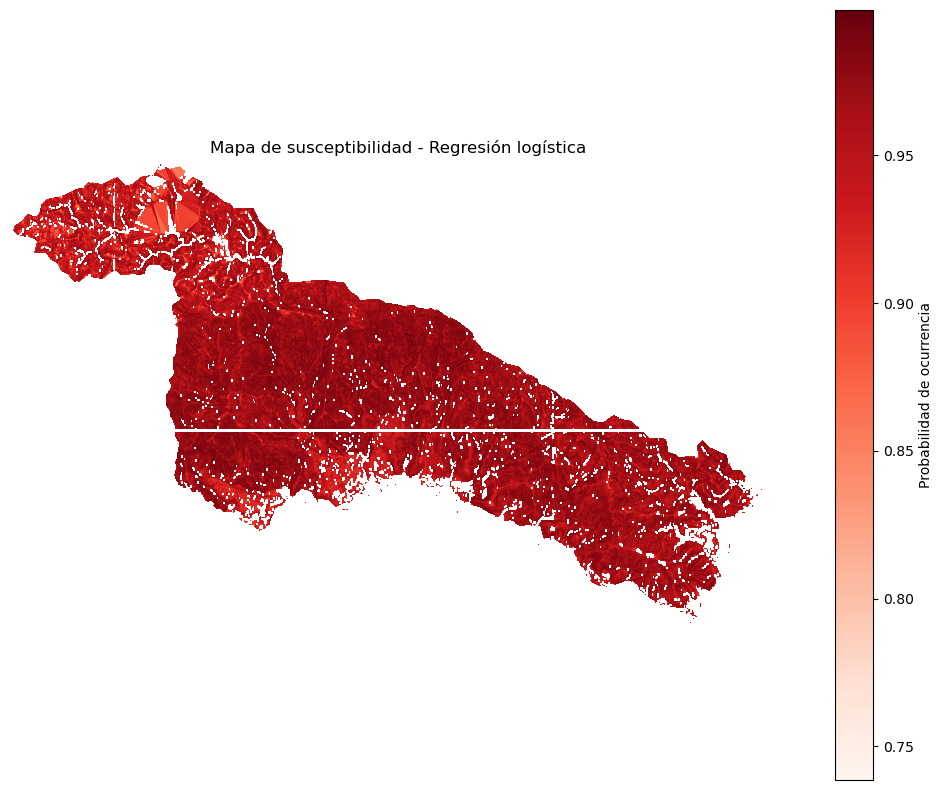

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(mapa_probabilidades, cmap="Reds")
plt.colorbar(label="Probabilidad de ocurrencia")
plt.title("Mapa de susceptibilidad - Regresión logística")
plt.axis("off")
plt.tight_layout()
plt.show()



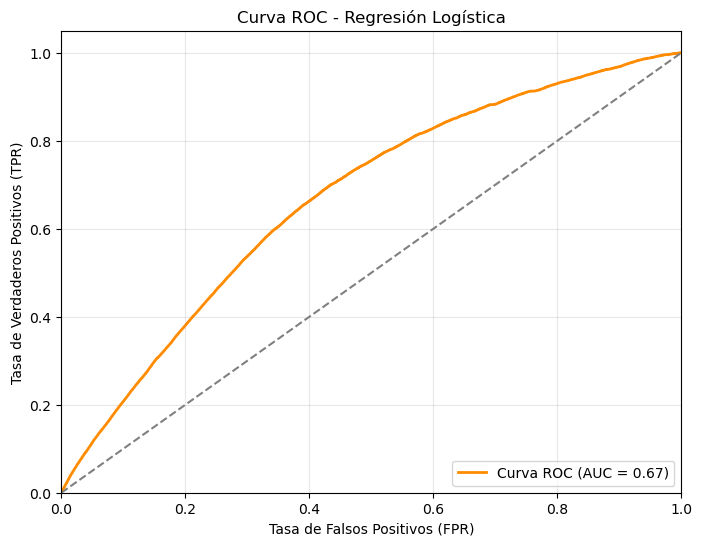

In [43]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Valores reales (clases verdaderas: 0 o 1)
y_real = dfLR["Inventario"]

# 2. Probabilidades predichas por el modelo
y_proba = lr.predict(dfLR)

# 3. Calcular los puntos de la curva ROC
fpr, tpr, thresholds = roc_curve(y_real, y_proba)
roc_auc = auc(fpr, tpr)

# 4. Graficar la curva
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # línea aleatoria
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Regresión Logística")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=1)
LDA



LinearDiscriminantAnalysis(n_components=1)

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Variables predictoras (igual que en regresión logística)
X = dfLR[["Pendiente", "Aspectos", "Elevación", "Flujo"]]

# Variable objetivo
y = dfLR["Inventario"]



In [46]:
LDA = LinearDiscriminantAnalysis(n_components=1)
LDA.fit(X, y)


LinearDiscriminantAnalysis(n_components=1)

In [47]:
y_proba_lda = LDA.predict_proba(X)[:, 1]  # probabilidad de clase 1 (deslizamiento)


In [48]:
mapa_lda = np.full(rows * cols, np.nan)
mapa_lda[mask_valida] = y_proba_lda
mapa_lda = mapa_lda.reshape((rows, cols))





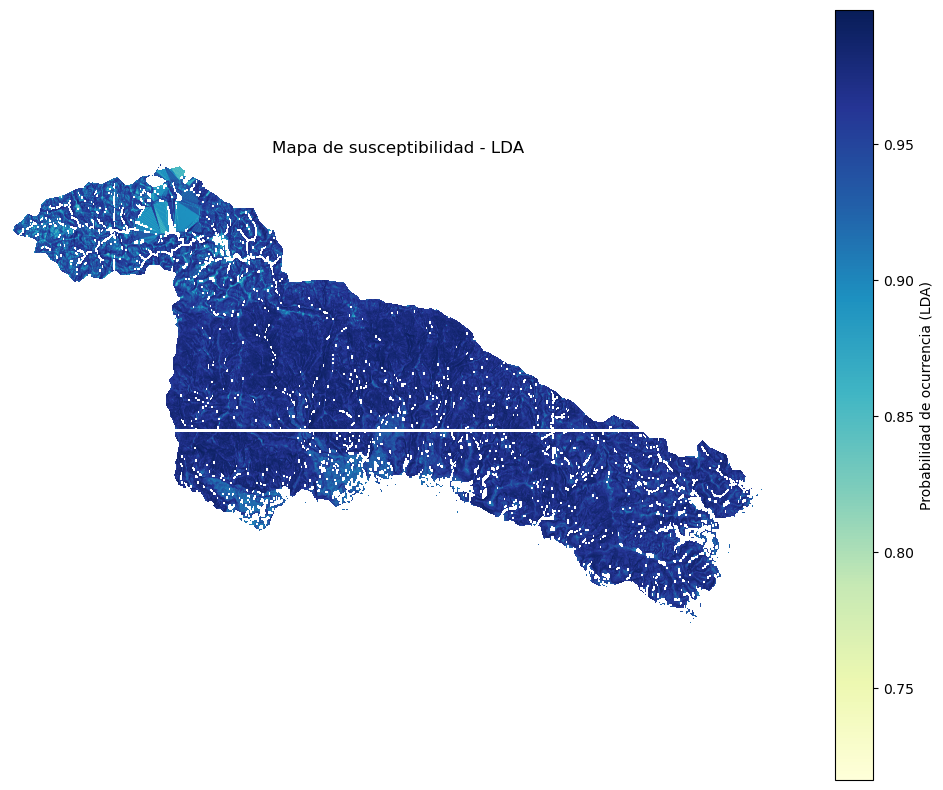

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(mapa_lda, cmap="YlGnBu")
plt.colorbar(label="Probabilidad de ocurrencia (LDA)")
plt.title("Mapa de susceptibilidad - LDA")
plt.axis("off")
plt.tight_layout()
plt.show()



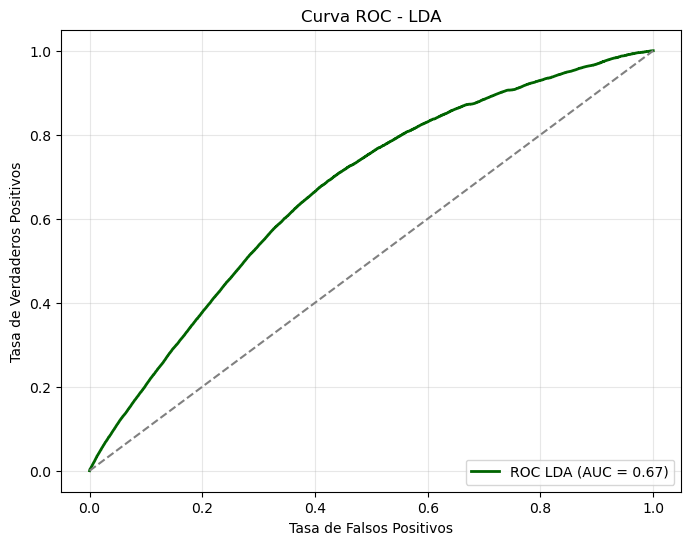

In [50]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y, y_proba_lda)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f"ROC LDA (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - LDA")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()



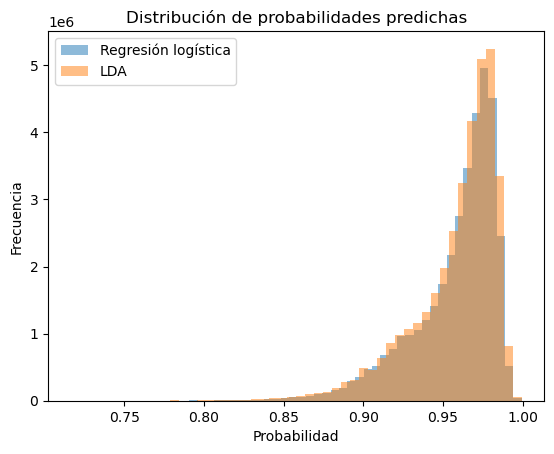

In [51]:
plt.hist(y_proba, bins=50, alpha=0.5, label="Regresión logística")
plt.hist(y_proba_lda, bins=50, alpha=0.5, label="LDA")
plt.legend()
plt.title("Distribución de probabilidades predichas")
plt.xlabel("Probabilidad")
plt.ylabel("Frecuencia")
plt.show()



In [52]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(5, 2),  # 2 capas ocultas: 5 neuronas y 2 neuronas
    max_iter=500,
    random_state=42,
    solver='adam',
    activation='relu',
    learning_rate_init=0.001
)

mlp.fit(X, y)




MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=500, random_state=42)

In [53]:
y_proba_mlp = mlp.predict_proba(X)[:, 1]  # Probabilidad de clase 1



In [54]:
mapa_mlp = np.full(rows * cols, np.nan)
mapa_mlp[mask_valida] = y_proba_mlp
mapa_mlp = mapa_mlp.reshape((rows, cols))





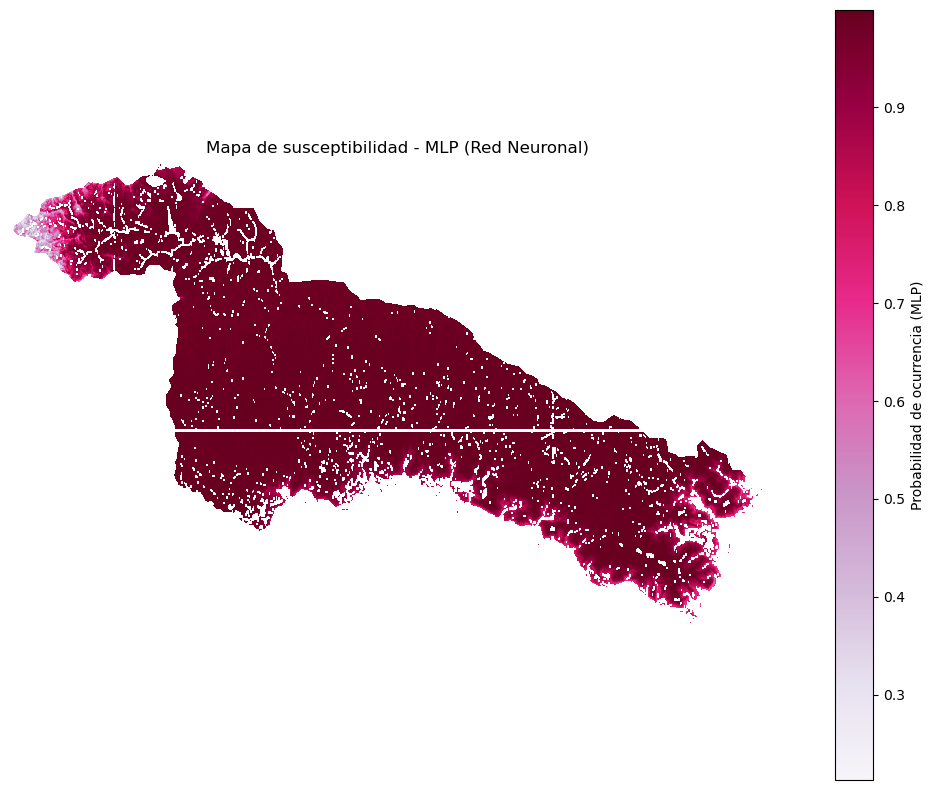

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(mapa_mlp, cmap="PuRd")
plt.colorbar(label="Probabilidad de ocurrencia (MLP)")
plt.title("Mapa de susceptibilidad - MLP (Red Neuronal)")
plt.axis("off")
plt.tight_layout()
plt.show()


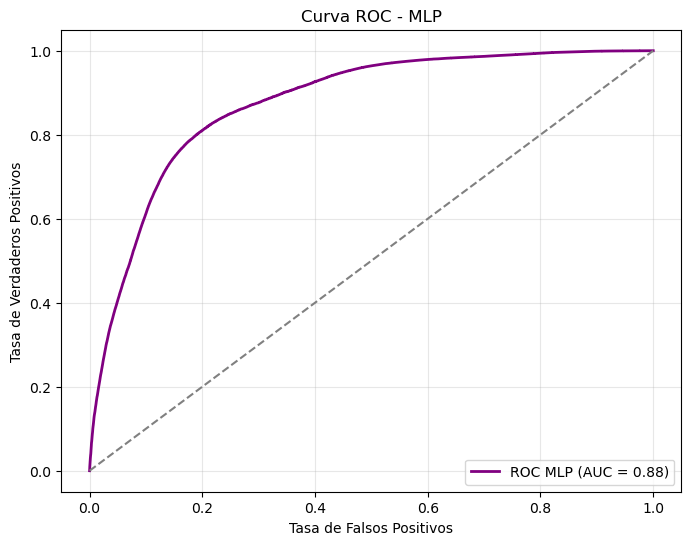

In [56]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y, y_proba_mlp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f"ROC MLP (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - MLP")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Seleccionar una muestra de 20.000 datos para que entrene más rápido
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=20000, stratify=y, random_state=42)

# Entrenar Random Forest con menos árboles para mayor velocidad
rf = RandomForestClassifier(
    n_estimators=200,             # Menos árboles que los 1000 anteriores
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

rf.fit(X_sample, y_sample)




RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [60]:
# Predecir sobre TODO el conjunto X
y_proba_rf = rf.predict_proba(X)[:, 1]  # Probabilidad de clase 1 (deslizamiento)



In [61]:
# Crear un array lleno de NaN con la forma total del mapa
mapa_rf = np.full(rows * cols, np.nan)

# Insertar las probabilidades solo en los píxeles válidos
mapa_rf[mask_valida] = y_proba_rf

# Reshape al tamaño 2D del raster original
mapa_rf = mapa_rf.reshape((rows, cols))


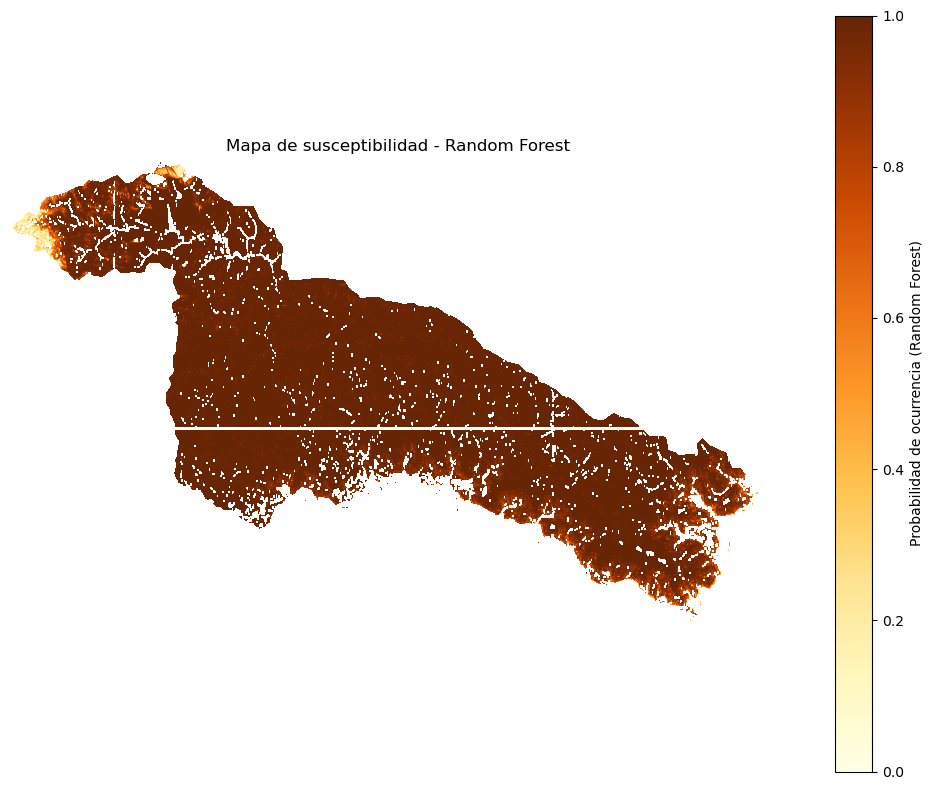

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(mapa_rf, cmap="YlOrBr")  # Puedes probar otros colormaps también
plt.colorbar(label="Probabilidad de ocurrencia (Random Forest)")
plt.title("Mapa de susceptibilidad - Random Forest")
plt.axis("off")
plt.tight_layout()
plt.show()


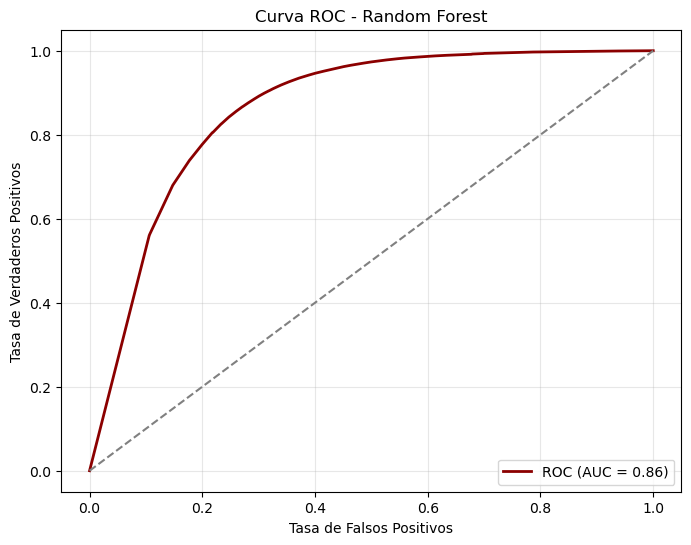

In [63]:
from sklearn.metrics import roc_curve, auc

# ROC y AUC usando todas las predicciones (no solo la muestra)
fpr, tpr, thresholds = roc_curve(y, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkred', lw=2, label=f"ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


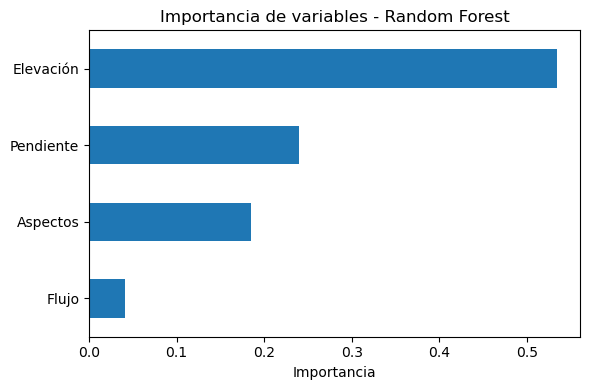

In [64]:
import pandas as pd

importancia = pd.Series(rf.feature_importances_, index=X.columns)
importancia.sort_values(ascending=True).plot(kind="barh", figsize=(6, 4))
plt.title("Importancia de variables - Random Forest")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()


In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Aplica a todo X, no solo la muestra



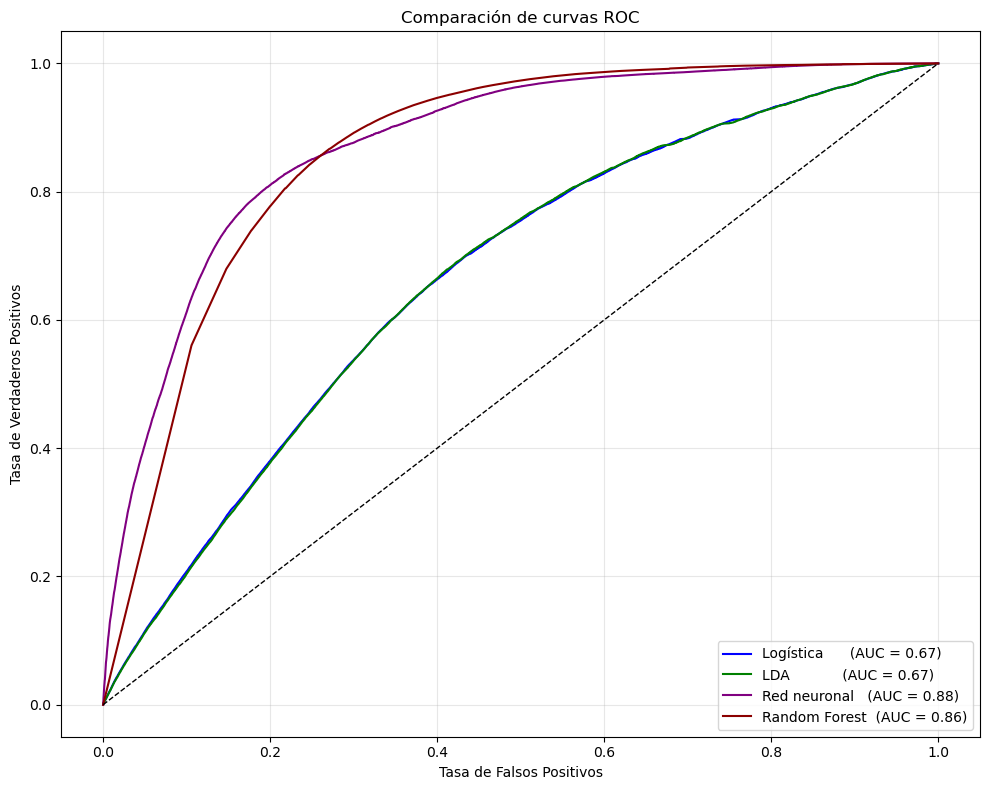

In [66]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Si hiciste escalado para MLP, asegúrate de usar X_scaled para ese caso
# Asumo que tienes X_scaled, de lo contrario usa X

# Obtener las probabilidades de cada modelo
proba_lr   = lr.predict(X)                          # statsmodels logit
proba_lda  = LDA.predict_proba(X)[:, 1]
proba_mlp  = mlp.predict_proba(X_scaled)[:, 1]      # Usa X_scaled si hiciste StandardScaler
proba_rf   = rf.predict_proba(X)[:, 1]

# Calcular las curvas ROC y AUC
fpr_lr, tpr_lr, _ = roc_curve(y, proba_lr)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_lda, tpr_lda, _ = roc_curve(y, proba_lda)
auc_lda = auc(fpr_lda, tpr_lda)

fpr_mlp, tpr_mlp, _ = roc_curve(y, proba_mlp)
auc_mlp = auc(fpr_mlp, tpr_mlp)

fpr_rf, tpr_rf, _ = roc_curve(y, proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Graficar todas las curvas
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr,  tpr_lr,  label=f'Logística      (AUC = {auc_lr:.2f})',  color='blue')
plt.plot(fpr_lda, tpr_lda, label=f'LDA            (AUC = {auc_lda:.2f})', color='green')
plt.plot(fpr_mlp, tpr_mlp, label=f'Red neuronal   (AUC = {auc_mlp:.2f})', color='purple')
plt.plot(fpr_rf,  tpr_rf,  label=f'Random Forest  (AUC = {auc_rf:.2f})',  color='darkred')

# Línea base
plt.plot([0, 1], [0, 1], 'k--', lw=1)

# Configuración
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Comparación de curvas ROC")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



In [67]:
import numpy as np

# Distancias mínimas al punto (0,1)
dist_lr   = np.min(np.sqrt(fpr_lr**2   + (1 - tpr_lr)**2))
dist_lda  = np.min(np.sqrt(fpr_lda**2  + (1 - tpr_lda)**2))
dist_mlp  = np.min(np.sqrt(fpr_mlp**2  + (1 - tpr_mlp)**2))
dist_rf   = np.min(np.sqrt(fpr_rf**2   + (1 - tpr_rf)**2))

# Guardar en diccionario
distancias = {
    "Regresión Logística": dist_lr,
    "LDA": dist_lda,
    "Red Neuronal (MLP)": dist_mlp,
    "Random Forest": dist_rf
}

# Imprimir cada una
print("📏 Distancia mínima al punto (0,1):\n")
for modelo, distancia in distancias.items():
    print(f"- {modelo}: {distancia:.4f}")

# Encontrar el mejor modelo (más cercano al ideal)
mejor_modelo = min(distancias, key=distancias.get)
print(f"\n🥇 El modelo más cercano al clasificador perfecto es: **{mejor_modelo}**")
print(f"👉 Con una distancia mínima de: {distancias[mejor_modelo]:.4f}")





📏 Distancia mínima al punto (0,1):

- Regresión Logística: 0.5216
- LDA: 0.5214
- Red Neuronal (MLP): 0.2752
- Random Forest: 0.2912

🥇 El modelo más cercano al clasificador perfecto es: **Red Neuronal (MLP)**
👉 Con una distancia mínima de: 0.2752


In [68]:
from sklearn.metrics import roc_curve
import numpy as np
import pandas as pd

# 1. Predecir probabilidades con el modelo entrenado
y_proba_mlp = mlp.predict_proba(X_scaled)[:, 1]

# 2. Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y, y_proba_mlp)

# 3. Buscar umbrales correspondientes a TPR ≈ 0.75 y ≈ 0.25
tpr_alta = 0.75
tpr_baja = 0.25

idx_alta = np.argmin(np.abs(tpr - tpr_alta))
idx_baja = np.argmin(np.abs(tpr - tpr_baja))

umbral_alta = thresholds[idx_alta]
umbral_baja = thresholds[idx_baja]

print(f"🔺 Umbral ALTA (TPR≈0.75): {umbral_alta:.4f}")
print(f"🔻 Umbral BAJA (TPR≈0.25): {umbral_baja:.4f}")

# 4. Clasificar en tres niveles
clasificacion = np.full_like(y_proba_mlp, 'Media', dtype=object)
clasificacion[y_proba_mlp >= umbral_alta] = 'Alta'
clasificacion[y_proba_mlp <= umbral_baja] = 'Baja'

# (Opcional) Guardar resultados en DataFrame si deseas
df_clasificacion = pd.DataFrame({
    'Probabilidad': y_proba_mlp,
    'Clase': clasificacion
})


🔺 Umbral ALTA (TPR≈0.75): 0.9804
🔻 Umbral BAJA (TPR≈0.25): 0.9943


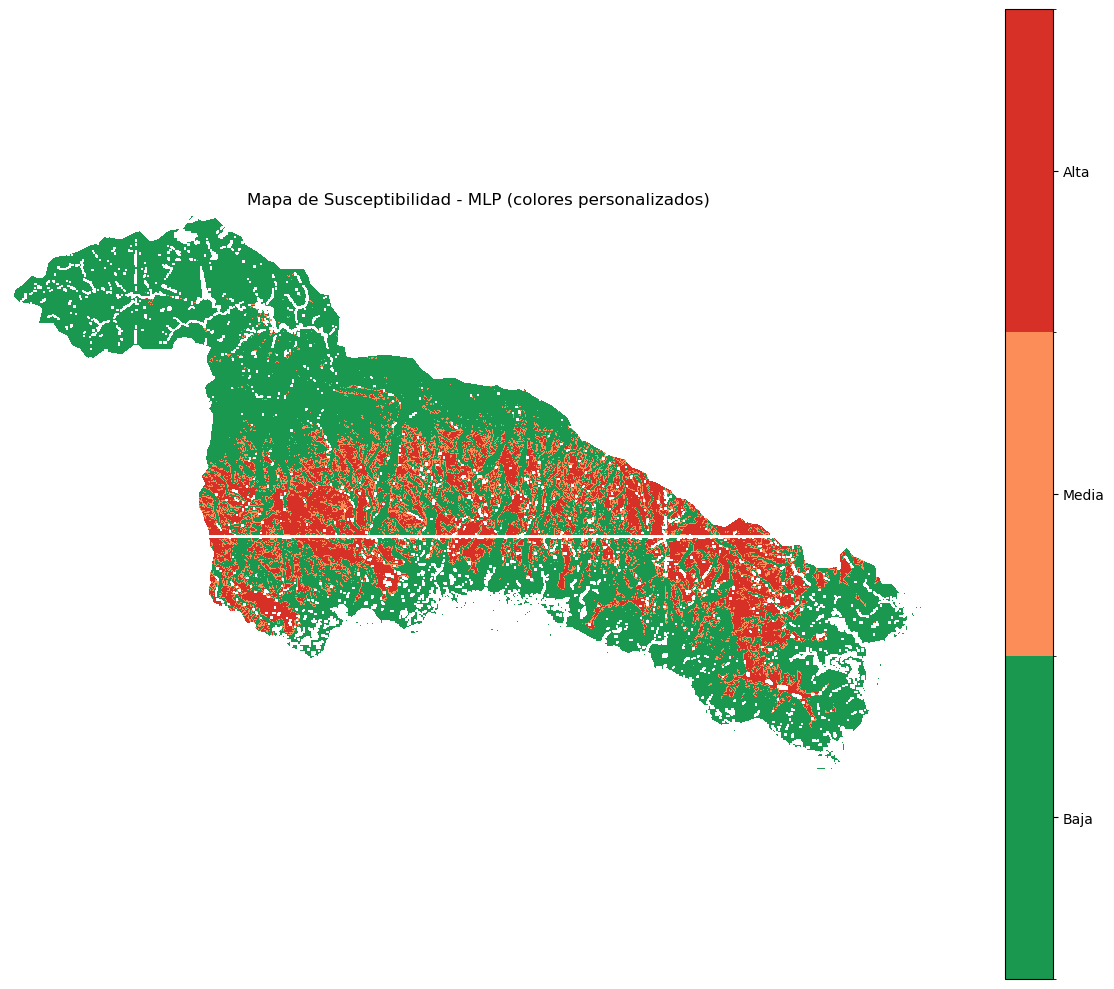

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# Crear un array plano con NaNs
mapa_susceptibilidad = np.full(rows * cols, np.nan, dtype=object)

# Asignar valores de clasificación donde la máscara es válida
mapa_susceptibilidad[mask_valida] = clasificacion

# Convertir a 2D
mapa_susceptibilidad = mapa_susceptibilidad.reshape((rows, cols))

# Colores personalizados
colores = {
    'Baja': '#1a9850',   # Verde
    'Media': '#fc8d59',  # Naranja
    'Alta': '#d73027'    # Rojo
}

# Crear mapa de colores para Matplotlib
cmap = ListedColormap([colores['Baja'], colores['Media'], colores['Alta']])
bounds = [-0.5, 0.5, 1.5, 2.5]
norm = BoundaryNorm(bounds, cmap.N)

# Convertir clases a valores numéricos
valores_numericos = np.full((rows, cols), np.nan)
valores_numericos[mapa_susceptibilidad == 'Baja'] = 0
valores_numericos[mapa_susceptibilidad == 'Media'] = 1
valores_numericos[mapa_susceptibilidad == 'Alta'] = 2

# Graficar
plt.figure(figsize=(12, 10))
img = plt.imshow(valores_numericos, cmap=cmap, norm=norm)
cbar = plt.colorbar(img, ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['Baja', 'Media', 'Alta'])
plt.title("Mapa de Susceptibilidad - MLP (colores personalizados)")
plt.axis("off")
plt.tight_layout()
plt.show()



In [125]:
import pandas as pd

# --- First Code Block: Processing 'mov' DataFrame ---
# Leer archivo ODS
mov = pd.read_excel(r'C:\Users\USUARIO\Desktop\chacho\M.ods', engine='odf')

# Asegurarte que la columna tenga el nombre correcto
mov.columns = mov.columns.str.strip()
mov = mov.rename(columns={mov.columns[0]: 'fecha_mov'}) # Renamed to fecha_mov
mov['fecha_mov'] = pd.to_datetime(mov['fecha_mov'])

# --- Second Code Block: Processing 'prec' DataFrame ---
# Leer el archivo desde la fila que contiene solo datos, omitiendo encabezado
prec = pd.read_csv(r'C:\Users\USUARIO\Desktop\chacho\dd.csv', skiprows=11, header=None)

# Asignar nombres de columnas
prec.columns = ['YEAR', 'MO', 'DY', 'PREC']

# Eliminar filas que tienen textos como 'YEAR' (por seguridad)
prec = prec[~prec['YEAR'].astype(str).str.contains("YEAR", na=False)]

# Convertir columnas a enteros (ahora sí)
prec[['YEAR', 'MO', 'DY']] = prec[['YEAR', 'MO', 'DY']].astype(int)

# Crear columna de fecha y renombrarla a fecha_lluvia
prec['fecha_lluvia'] = pd.to_datetime(dict(year=prec['YEAR'], month=prec['MO'], day=prec['DY']))

# --- Combining the DataFrames ---
# Merge the two DataFrames
# We'll perform an outer merge to keep all dates from both DataFrames.
# If you only want dates that exist in both, use how='inner'.
combined_df = pd.merge(
    mov,
    prec[['fecha_lluvia', 'PREC']], # Select only necessary columns from 'prec'
    left_on='fecha_mov',
    right_on='fecha_lluvia',
    how='outer'
)

# You might have NaN values where dates don't align in both original files.
# For example, if a fecha_mov doesn't have a corresponding fecha_lluvia, PREC will be NaN.

# Display the head of the combined DataFrame
print(combined_df.head())

# Display info about the combined DataFrame to see columns and non-null counts
print("\n--- Combined DataFrame Info ---")
combined_df.info()

# Example of how you can access the data:
print("\n--- Example Access ---")
# Get rows where there's precipitation data
print("Rows with precipitation data:")
print(combined_df.dropna(subset=['PREC']).head())

# Get rows for a specific 'fecha_mov' (adjust column name as per your actual mov data)
# For example, if you had a 'valor' column in your mov data:
# print("\nRows for a specific fecha_mov (example with an imaginary 'valor' column):")
# print(combined_df[combined_df['fecha_mov'] == '2023-01-01'])



  fecha_mov fecha_lluvia  PREC
0       NaT   2008-01-02  1.05
1       NaT   2008-01-03  0.59
2       NaT   2008-01-04  0.26
3       NaT   2008-01-05  0.00
4       NaT   2008-01-06  0.00

--- Combined DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6648 entries, 0 to 6647
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha_mov     266 non-null    datetime64[ns]
 1   fecha_lluvia  6648 non-null   datetime64[ns]
 2   PREC          6648 non-null   float64       
dtypes: datetime64[ns](2), float64(1)
memory usage: 155.9 KB

--- Example Access ---
Rows with precipitation data:
  fecha_mov fecha_lluvia  PREC
0       NaT   2008-01-02  1.05
1       NaT   2008-01-03  0.59
2       NaT   2008-01-04  0.26
3       NaT   2008-01-05  0.00
4       NaT   2008-01-06  0.00


In [146]:
# Leer archivo ODS
# ... (carga y limpieza de 'mov') ...

# Leer el archivo CSV
# ... (carga y limpieza de 'prec') ...

# Merge the two DataFrames
combined_df = pd.merge(
     mov,
     prec[['fecha_lluvia', 'PREC']],
     left_on='fecha_mov',
     right_on='fecha_lluvia',
     how='outer' # <--- ¡Este es el punto clave!
)

Número de AÑOS ÚNICOS con deslizamientos: 8
Período de observación (años): 16
Tasa de ocurrencia (lambda_rate_por_año): 0.5000 años con deslizamiento / año de observación


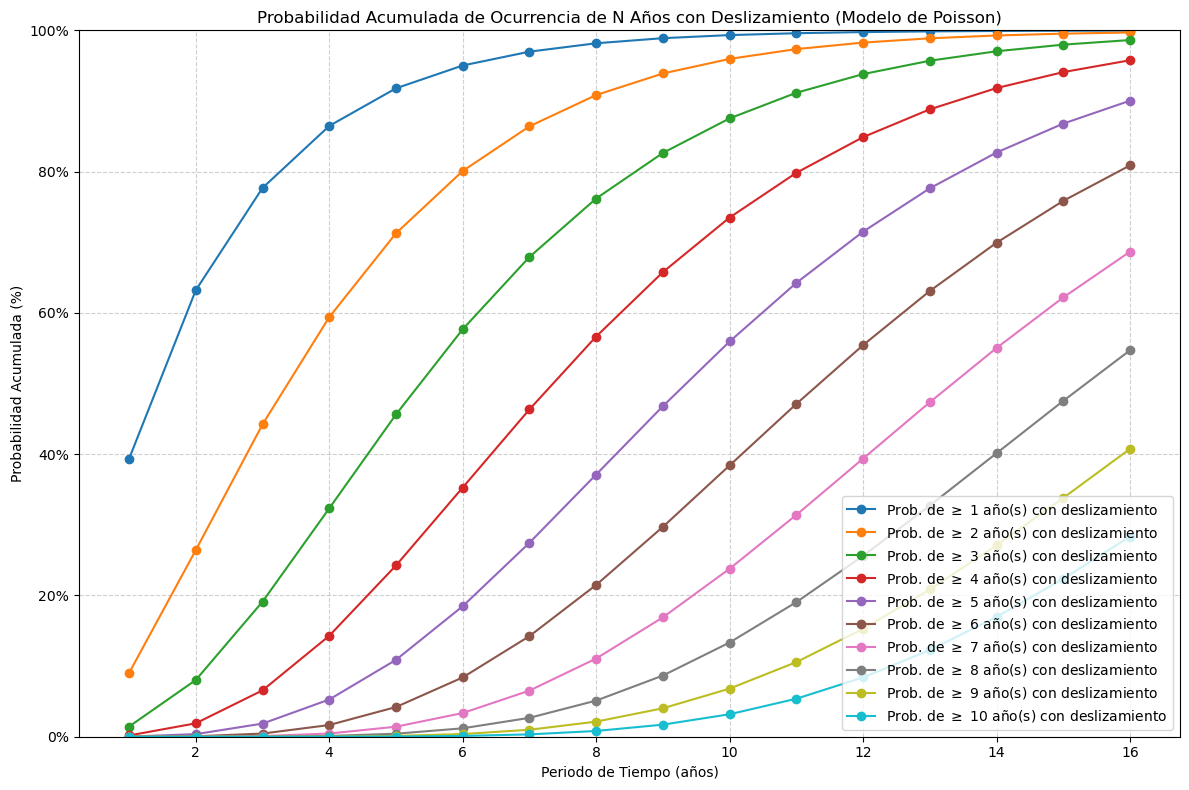

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from math import exp, factorial



# Obtener los años únicos en los que se registró un deslizamiento
unique_landslide_years = mov['fecha_mov'].dt.year.unique()
N_total_landslides_unique_years = len(unique_landslide_years) # Este es el N que deberías usar

# Calcular el rango de años de observación
min_year = mov['fecha_mov'].min().year
max_year = mov['fecha_mov'].max().year
period_of_observation_years = max_year - min_year + 1

# Calcular lambda (tasa media de ocurrencia) con el N de años únicos
lambda_rate = N_total_landslides_unique_years / period_of_observation_years
print(f"Número de AÑOS ÚNICOS con deslizamientos: {N_total_landslides_unique_years}")
print(f"Período de observación (años): {period_of_observation_years}")
print(f"Tasa de ocurrencia (lambda_rate_por_año): {lambda_rate:.4f} años con deslizamiento / año de observación")

# Definir la función de masa de probabilidad de Poisson
def poisson_pmf(k, lambda_val):
    if k < 0:
        return 0
    return (exp(-lambda_val) * (lambda_val)**k) / factorial(k)

# Rango de periodos de tiempo (años)
time_periods = np.arange(1, period_of_observation_years + 1, 1)

# Números de "eventos" para los que queremos calcular la probabilidad (de 1 a 10)
# En este contexto, "eventos" se refiere a "N años con un deslizamiento"
# Si lambda_rate es la tasa de "años con deslizamiento", entonces
# P(N >= 2) será la prob. de "al menos 2 ocurrencias de un año con deslizamiento" en el periodo 't'.
num_events_to_plot = range(1, 11) # De 1 a 10

plt.figure(figsize=(12, 8))

for n_events in num_events_to_plot:
    probabilities = []
    for t in time_periods:
        # La lambda acumulada para el periodo t
        lambda_t_cumulative = lambda_rate * t

        # Calcular P(N < n_events) = sum(P(N=k) for k in 0 to n_events-1)
        prob_less_than_n = 0
        for k in range(n_events):
            prob_less_than_n += poisson_pmf(k, lambda_t_cumulative)

        prob_at_least_n = 1 - prob_less_than_n
        probabilities.append(prob_at_least_n)

    plt.plot(time_periods, np.array(probabilities) * 100, marker='o', linestyle='-',
             label=f'Prob. de $\\geq$ {n_events} año(s) con deslizamiento')

plt.xlabel('Periodo de Tiempo (años)')
plt.ylabel('Probabilidad Acumulada (%)')
plt.title('Probabilidad Acumulada de Ocurrencia de N Años con Deslizamiento (Modelo de Poisson)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right', bbox_to_anchor=(1.0, 0.0))
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=100.0))
plt.ylim(0, 100)
plt.tight_layout()
plt.show()